# AIM : Cement Prediction using ARIMA model .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('./Cement-Production.xlsx')

In [3]:
data.head()

,Period,Month,Cement Consumption
0,1,2001-04-01,333224
1,2,2001-05-01,399256
2,3,2001-06-01,626754
3,4,2001-07-01,366388
4,5,2001-08-01,361452


In [4]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Period  Month  Cement Consumption
0     False  False               False
1     False  False               False
2     False  False               False
3     False  False               False
4     False  False               False
..      ...    ...                 ...
111   False  False               False
112   False  False               False
113   False  False               False
114   False  False               False
115   False  False               False

[116 rows x 3 columns]>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Period              116 non-null    int64         
 1   Month               116 non-null    datetime64[ns]
 2   Cement Consumption  116 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 KB


In [6]:
data.set_index('Month', inplace=True)

In [7]:
data

,Period,Cement Consumption
Month,,
2001-04-01,1,333224
2001-05-01,2,399256
2001-06-01,3,626754
2001-07-01,4,366388
2001-08-01,5,361452
...,...,...
2010-07-01,112,717713
2010-08-01,113,668939
2010-09-01,114,687420


In [8]:
Cement= data.drop('Period', axis = 1)

In [9]:
Cement

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452
...,...
2010-07-01,717713
2010-08-01,668939
2010-09-01,687420


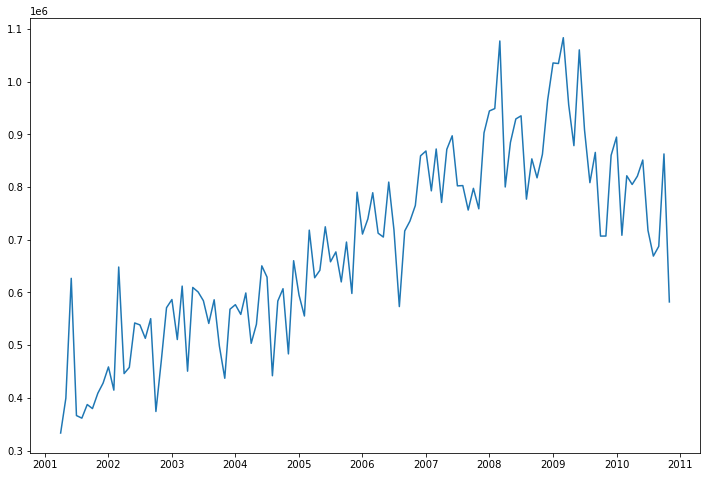

In [10]:
plt.figure(figsize=(12,8))
plt.plot(data['Cement Consumption'])

# Missing Values Check

In [11]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Period  Cement Consumption
Month                                 
2001-04-01   False               False
2001-05-01   False               False
2001-06-01   False               False
2001-07-01   False               False
2001-08-01   False               False
...            ...                 ...
2010-07-01   False               False
2010-08-01   False               False
2010-09-01   False               False
2010-10-01   False               False
2010-11-01   False               False

[116 rows x 2 columns]>

# KPSS Test

In [12]:
from statsmodels.tsa.stattools import kpss

In [13]:
stats, p, lags, critical_values = kpss(data['Cement Consumption'], 'ct')

G:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.22444607894638652
p-value: 0.01
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


# 1st Order Differencing 

In [15]:
Cement_diff = Cement.diff()

In [16]:
Cement_diff

,Cement Consumption
Month,
2001-04-01,NaN
2001-05-01,66032.0
2001-06-01,227498.0
2001-07-01,-260366.0
2001-08-01,-4936.0
...,...
2010-07-01,-133516.0
2010-08-01,-48774.0
2010-09-01,18481.0


In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# Cement_diff1= Cement_diff.drop('Period', axis = 1)

In [19]:
#Cement_diff1

In [20]:
result= adfuller(Cement_diff.dropna())

In [21]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationsary")
else:
    print("The series is not Stationsary")

Test Statistics : -2.2202270425507535
P Value : 0.19898627907590827
Critical Values: 
 {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The series is not Stationsary


# 2nd Order Differencing

In [22]:
Cement_diff2 = Cement_diff.diff()

In [23]:
result= adfuller(Cement_diff.diff().dropna())

In [24]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationary")
else:
    print("The series is not Stationary")

Test Statistics : -7.864725158128122
P Value : 5.171204567755397e-12
Critical Values: 
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}
The series is Stationary


# ACF graph 

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

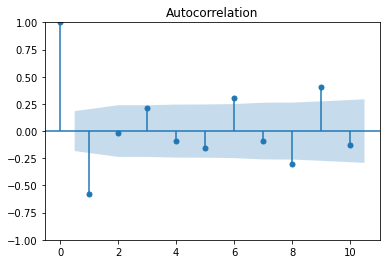

In [26]:
acf= plot_acf(Cement_diff.diff().dropna(), lags=10) # ACF plot gives you the q value

# PACF graph

G:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


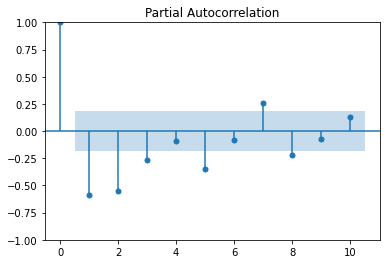

In [27]:
pacf= plot_pacf(Cement_diff.diff().dropna(), lags=10) # PACF plot gives you the p value

In [159]:
from statsmodels.tsa.arima.model import ARIMA

In [160]:
Cement

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452
...,...
2010-07-01,717713
2010-08-01,668939
2010-09-01,687420


In [161]:
# Let us split the data into train and test
len(Cement)

116

In [162]:
# Suppose we would be using 120 months data for training and 24 months data for testing
# for training and testing the data in time series we cant use sklearn model or library ,
# we need to use iloc here

train =Cement.iloc[:92]
test=Cement.iloc[92:]

In [163]:
len(train)

92

In [164]:
len(test)

24

# Building ARIMA model

In [165]:
model = ARIMA(train,order=(0,2,0))

In [166]:
arima = model.fit()

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
test

,Cement Consumption
Month,
2008-12-01,964972
2009-01-01,1035379
2009-02-01,1034340
2009-03-01,1083330
2009-04-01,956051
2009-05-01,878473
2009-06-01,1060211
2009-07-01,908548
2009-08-01,808259


In [169]:
test.index[0]

Timestamp('2008-12-01 00:00:00')

In [170]:
test.index[-1]

Timestamp('2010-11-01 00:00:00')

In [171]:
start = test.index[0]
end= test.index[-1]

In [172]:
test['Prediction'] = arima.predict(start=start,end=end)

In [173]:
test.head()

,Cement Consumption,Prediction
Month,,
2008-12-01,964972,907028.0
2009-01-01,1035379,951830.0
2009-02-01,1034340,996632.0
2009-03-01,1083330,1041434.0
2009-04-01,956051,1086236.0


In [174]:
# to evaluate the model we would use a metric MAPE

from sklearn.metrics import mean_absolute_percentage_error

# Error Calculation

In [175]:
print(mean_absolute_percentage_error(test['Cement Consumption'],test['Prediction']))

0.7883642957159375


<AxesSubplot:xlabel='Month'>

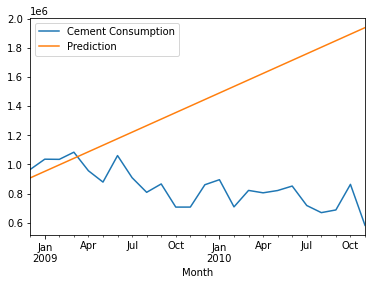

In [176]:
test[['Cement Consumption','Prediction']].plot()

# Conclusion : We can conclude that the data given are suffiecient to prdict the cement production per month